# Exercícios 4.2, 4.3 e 4.4 do livro texto

<div style="text-align: right"> 
2018/3  <br/>
Aluno: Pedro Bandeira de Mello Martins  <br/>
Disciplina: CPE773 - Otimização Convexa  <br/>
Professor: Wallace A. Martins  <br/>
PEE/COPPE - UFRJ  </div>

Minimizar $f(x)$ no intervalo dado com incerteza menor que $10^{-5}$ com os métodos:

1. Fibonacci Search
2. Golden-Section Search
3. Quadratic Interpolaton Method
4. Cubic Interpolation Method
5. Davies, Swann and Campey algorithm
6. Backtracking Line Search
7. Brute Force (implementação do scipy)

O algoritmo de força bruta foi utilizado para compararmos a quantidade necessária de avaliações para se chegar ao mesmo resultado.

Os pacotes utilizados nesses exercícios são:

In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from copy import copy
import operator

from scipy.optimize import brute
from functions import order5_polynomial, logarithmic, sinoid
from functions import functionObj
from models.optimizers import DichotomousSearch, FibonacciSearch, GoldenSectionSearch, \
                                QuadraticInterpolationSearch, CubicInterpolation, DaviesSwannCampey, \
                                BacktrackingLineSearch

Para cada exercício, a função abaixo do arquivo [run_exercises.py](run_exercises.py) é rodada, onde se entrega a função a ser minimizada pelos métodos acima e ela retorna um _dataframe_ com todas as informações obtidas durante as minimizações.

In [2]:
from run_exercises import run_exercise

Os gráficos são gerados pela função:

In [3]:
def show_chart(df):
    fig, axes = plt.subplots(4, 2, figsize = (13, 10))
    for algorithm, ax in zip(df.index, axes.flatten()):
        ax.plot(range(df['fevals'][algorithm]), df['all_evals'][algorithm])
        ax.set_title(algorithm)
        ax.ticklabel_format(axis = 'y', style = 'plain')
        ax.set_xlabel('Function evaluations')
        ax.set_ylabel('$f(x)$')
    plt.tight_layout()
    plt.show()

## Exercício 4.2
$f(x) = -5x^5 + 4x^4 - 12x^3 + 11x^2 - 2x + 1$

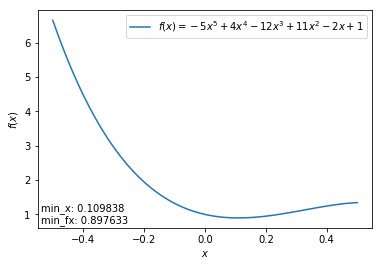

In [4]:
results_42 = run_exercise(order5_polynomial, f_string = '$f(x) = -5x^5+4x^4-12x^3+11x^2-2x+1$', interval = [-0.5, 0.5])

### Resultados

In [5]:
results_42[['best_f', 'best_x', 'fevals', 'run_time (s)']]

,best_f,best_x,fevals,run_time (s)
Brute Force,0.897633,0.109838,43,0.016573
Dichotomous Search,0.897633,0.109862,34,0.002327
Fibonacci Search,0.897633,0.109860,3,0.000338
Golden-Section Search,0.897633,0.109860,3,0.000226
Quadratic Interpolation Method,0.897633,0.109860,5,0.000673
Cubic interpolation Method,0.897633,0.109860,7,0.003159
"Davies, Swann and Campey Algorithm",0.897633,0.109861,9,0.001400
Backtracking Line Search,0.897633,0.109860,8,0.003623


### Eficiência computacional em avaliações de funções e tempo de execução.

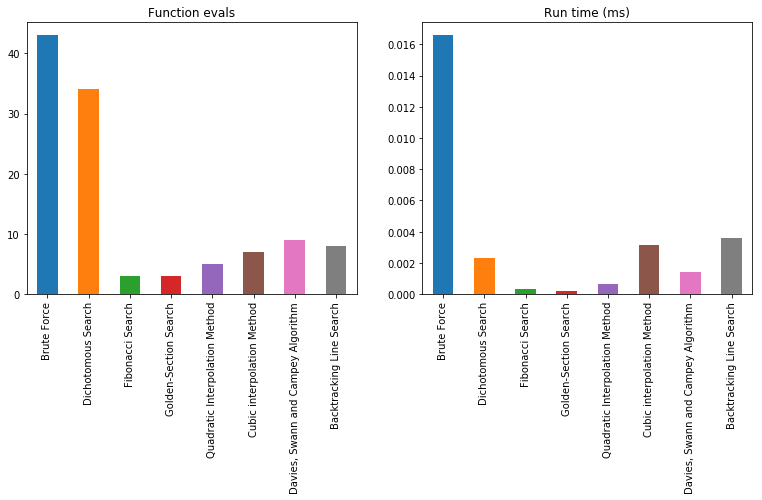

In [20]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
results_42['fevals'].plot.bar(title = 'Function evals', ax= axes[0])
(results_42['run_time (s)']*1e3).plot.bar(title = 'Run time (ms)', ax=axes[1])
plt.show()

### Gráficos de f(x) por avaliações.

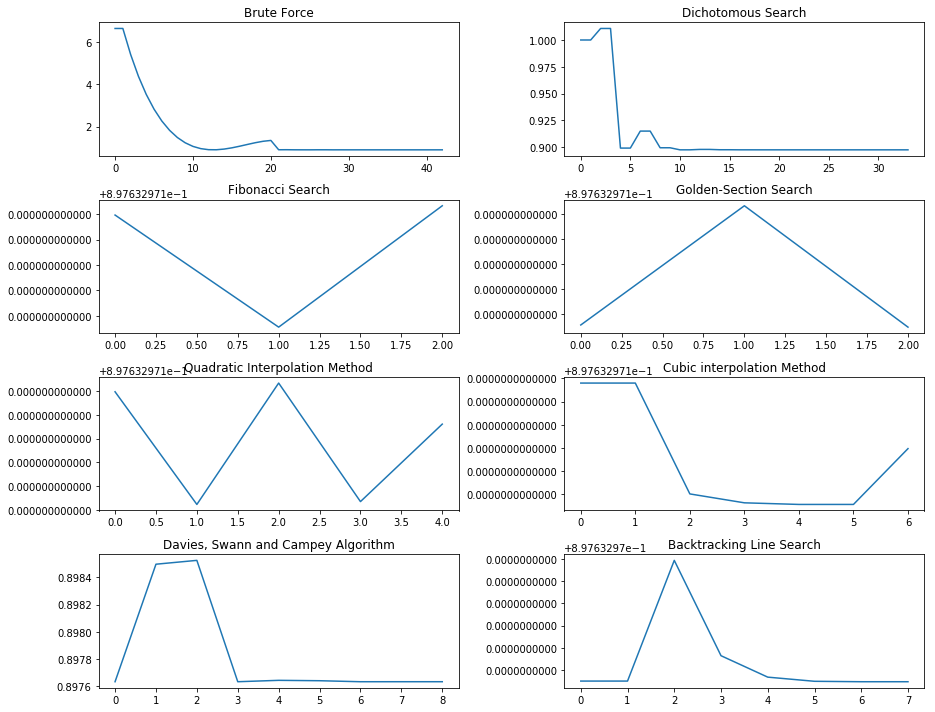

In [7]:
show_chart(results_42)

## Exercício 4.3
$f(x) = \ln ^2 (x-2) + \ln ^2(10-x) - x^{0.2}$

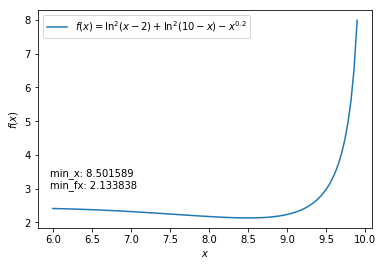

In [8]:
results_43 = run_exercise(logarithmic, f_string = '$f(x) = \ln ^2 (x-2) + \ln ^2(10-x) - x^{0.2}$', 
                          seed =  9, 
                          textpos = (12,40),
                          interval = [6, 9.9])

### Resultados

In [9]:
results_43[['best_f', 'best_x', 'fevals', 'run_time (s)']]

,best_f,best_x,fevals,run_time (s)
Brute Force,2.133838,8.501589,49,0.008564
Dichotomous Search,2.133838,8.501585,38,0.003129
Fibonacci Search,2.133838,8.501586,3,0.000313
Golden-Section Search,2.133838,8.501586,3,0.000231
Quadratic Interpolation Method,2.133838,8.501587,5,0.000391
Cubic interpolation Method,2.133838,8.501587,7,0.002393
"Davies, Swann and Campey Algorithm",2.133838,8.501585,15,0.002132
Backtracking Line Search,2.133838,8.501586,4,0.002253


### Eficiência computacional em avaliações de funções e tempo de execução.

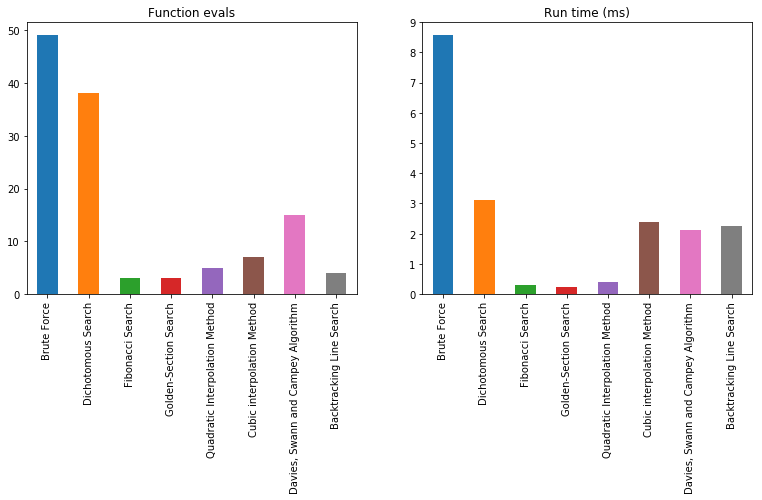

In [21]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
results_43['fevals'].plot.bar(title = 'Function evals', ax= axes[0])
(results_43['run_time (s)']*1e3).plot.bar(title = 'Run time (ms)', ax=axes[1])
plt.show()

### Gráficos de f(x) por avaliações.

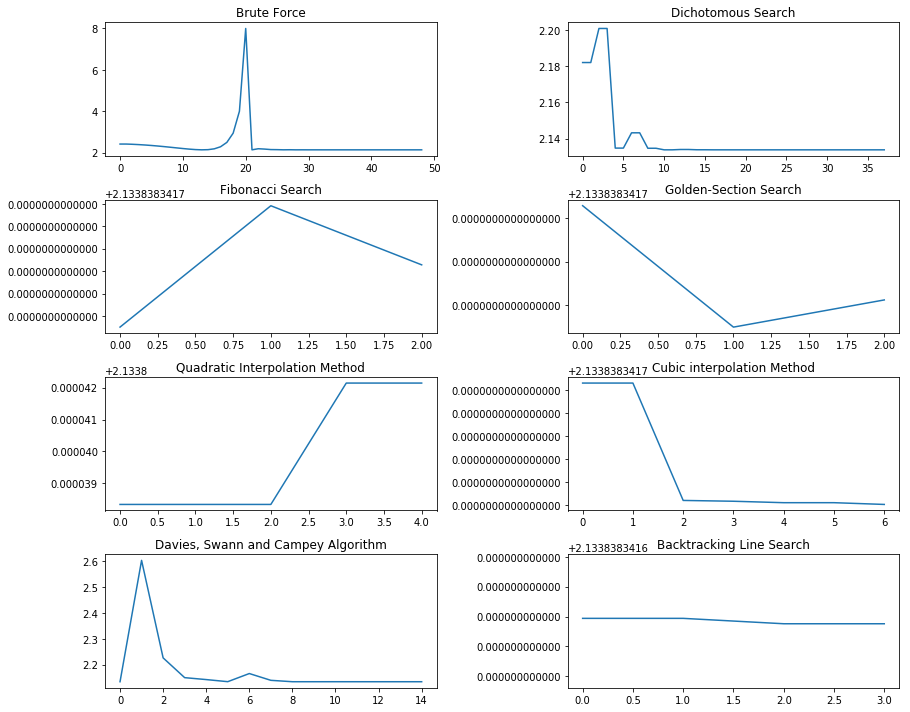

In [11]:
show_chart(results_43)

## Exercício 4.4
$f(x) = -3x\sin 0.75 x + e ^{-2x}$

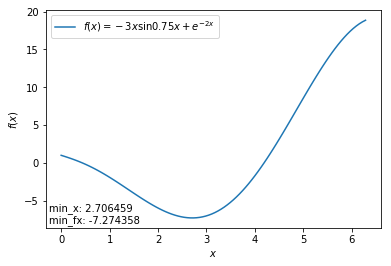

In [12]:
results_44 = run_exercise(sinoid, f_string = '$f(x) = -3x\sin 0.75 x + e ^{-2x}$', 
                          seed =  9, 
                          interval = [0, 2*np.pi])

### Resultados

In [13]:
results_44[['best_f', 'best_x', 'fevals', 'run_time (s)']]

,best_f,best_x,fevals,run_time (s)
Brute Force,-7.274358,2.706459,45,0.007532
Dichotomous Search,-7.274358,2.706477,40,0.003280
Fibonacci Search,-7.274358,2.706476,3,0.000364
Golden-Section Search,-7.274358,2.706476,3,0.000244
Quadratic Interpolation Method,-7.274358,2.706476,5,0.000417
Cubic interpolation Method,-7.274358,2.706476,7,0.002074
"Davies, Swann and Campey Algorithm",-7.274358,2.706475,12,0.001696
Backtracking Line Search,-7.274358,2.706475,7,0.002195


### Eficiência computacional em avaliações de funções e tempo de execução.

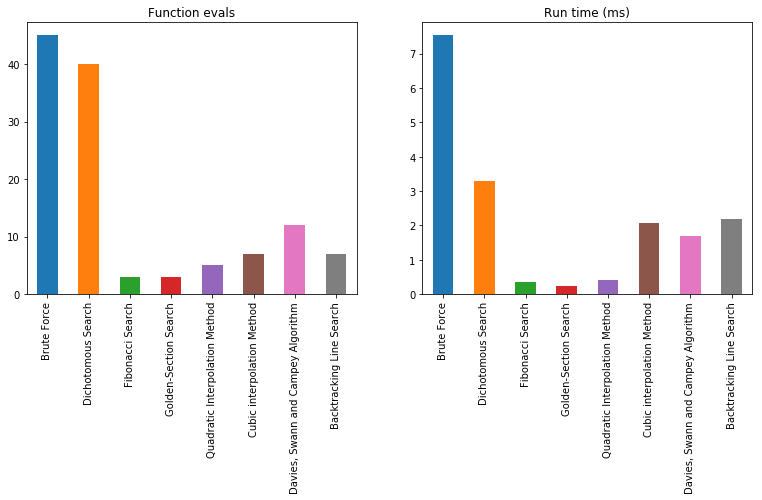

In [22]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
results_44['fevals'].plot.bar(title = 'Function evals', ax= axes[0])
(results_44['run_time (s)']*1e3).plot.bar(title = 'Run time (ms)', ax=axes[1])
plt.show()

### Gráficos de f(x) por avaliações.

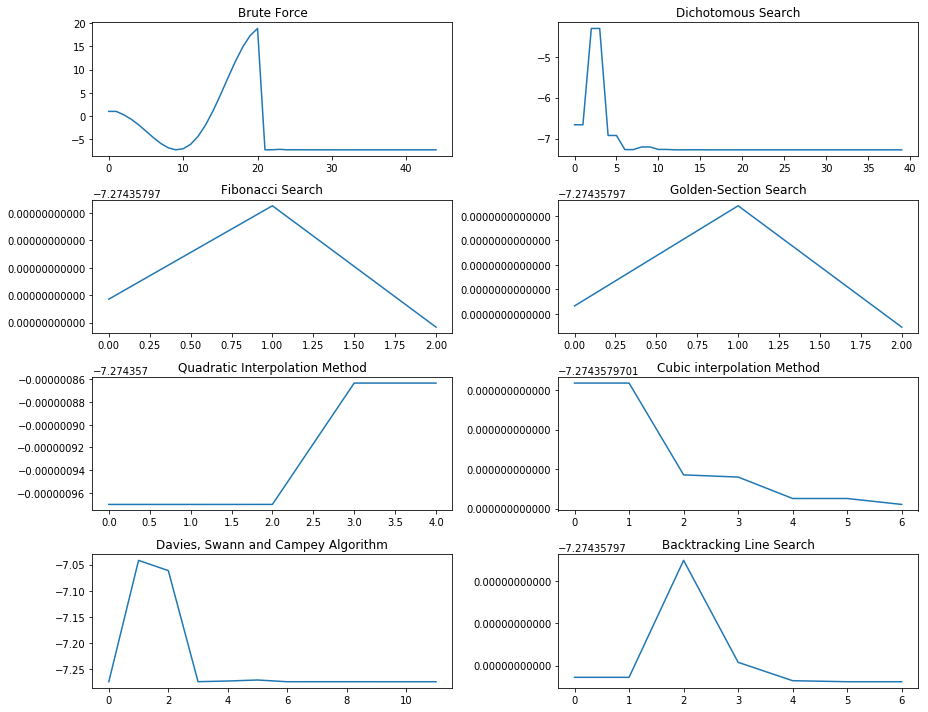

In [15]:
show_chart(results_44)